In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
df.shape,df_test.shape

((630000, 13), (270000, 12))

Feature engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB


In [6]:
df.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

In [7]:
df_test.isnull().sum()

id                  0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
dtype: int64

In [8]:
df

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.300
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.700
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.000
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.900
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629995,629995,18,female,b.tech,4.86,70.7,yes,4.1,good,mixed,high,moderate,69.500
629996,629996,21,female,ba,7.08,54.4,yes,4.5,average,mixed,low,moderate,78.900
629997,629997,24,male,bca,0.64,44.2,yes,4.3,poor,online videos,low,moderate,19.599
629998,629998,20,male,b.com,1.54,75.1,yes,8.2,average,group study,high,moderate,59.100


In [9]:
df.describe()

,id,age,study_hours,class_attendance,sleep_hours,exam_score
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000
mean,314999.500000,20.545821,4.002337,71.987261,7.072758,62.506672
std,181865.479132,2.260238,2.359880,17.430098,1.744811,18.916884
min,0.000000,17.000000,0.080000,40.600000,4.100000,19.599000
25%,157499.750000,19.000000,1.970000,57.000000,5.600000,48.800000
50%,314999.500000,21.000000,4.000000,72.600000,7.100000,62.600000
75%,472499.250000,23.000000,6.050000,87.200000,8.600000,76.300000
max,629999.000000,24.000000,7.910000,99.400000,9.900000,100.000000


EDA

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'study_hours'}>,
        <Axes: title={'center': 'class_attendance'}>],
       [<Axes: title={'center': 'sleep_hours'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

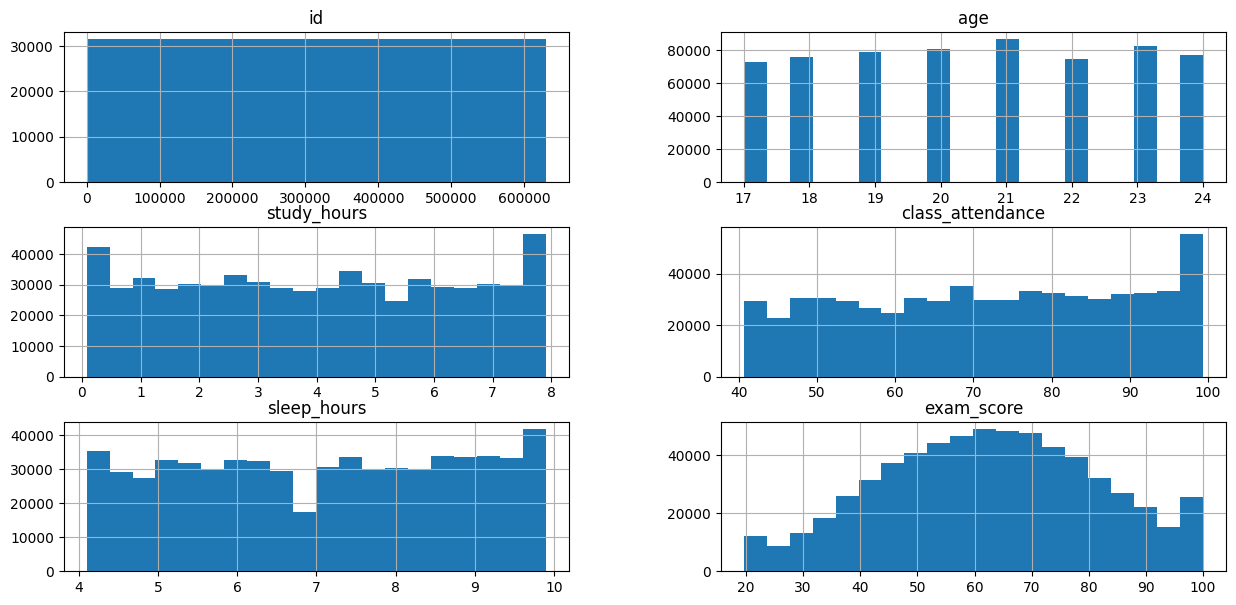

In [10]:
df.hist(bins=20,figsize=(15,7))

In [11]:
cat_col=df.select_dtypes(include=["object"]).columns

In [12]:
cat_col

Index(['gender', 'course', 'internet_access', 'sleep_quality', 'study_method',
       'facility_rating', 'exam_difficulty'],
      dtype='object')

In [13]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [14]:
X.drop('id',axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),cat_col)],remainder='passthrough')
X=ct.fit_transform(X)
df_test=ct.transform(df_test)

In [16]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X)
df_test=st.transform(df_test)

In [17]:
X

array([[ 1.42279258, -0.70860486, -0.70987895, ...,  1.65587454,
         1.53830232, -1.24526941],
       [-0.70284314, -0.70860486,  1.40869089, ...,  0.40157263,
         1.30881404, -1.3598951 ],
       [ 1.42279258, -0.70860486, -0.70987895, ...,  0.28715996,
         1.18259548, -0.72945382],
       ...,
       [-0.70284314,  1.41122373, -0.70987895, ..., -1.42479264,
        -1.59421271, -1.58914647],
       [-0.70284314,  1.41122373, -0.70987895, ..., -1.04341706,
         0.17858426,  0.64605443],
       [-0.70284314, -0.70860486,  1.40869089, ..., -0.02641552,
         0.19005867, -0.72945382]], shape=(630000, 30))

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

Linear Regerssion

Rmse value:8.883726541047912
R2_score:0.77790274669457


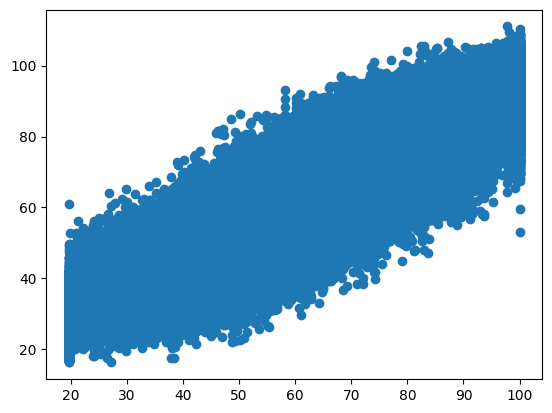

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,root_mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

Ridge regression

Rmse value:8.883726392996978
R2_score:0.777902754097253


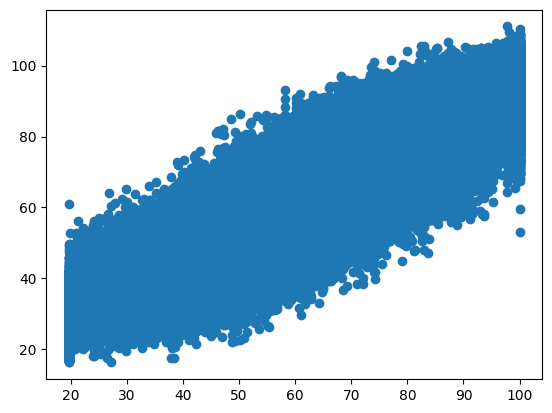

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,root_mean_squared_error
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

Lasso Regression

Rmse value:9.294945853881341
R2_score:0.7568655198236949


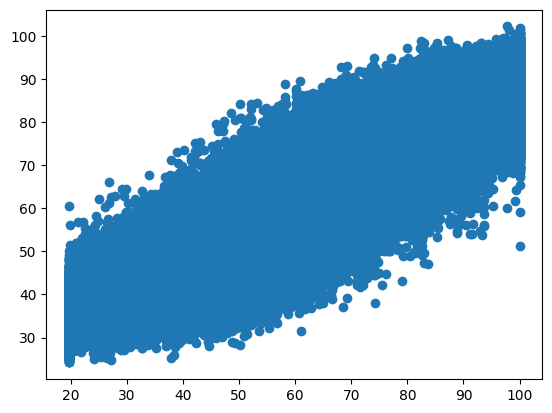

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,root_mean_squared_error
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

**Cross validation**

lasso cv

Rmse value:8.883586166554093
R2_score:0.7779097654930552


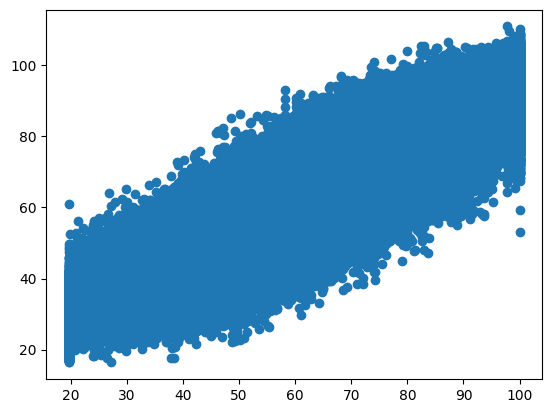

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score,root_mean_squared_error
lassocv=LassoCV(cv=5)
lassocv.fit(X_train,y_train)
y_pred=lassocv.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

Ridge cv

Rmse value:8.883725065304956
R2_score:0.7779028204830705


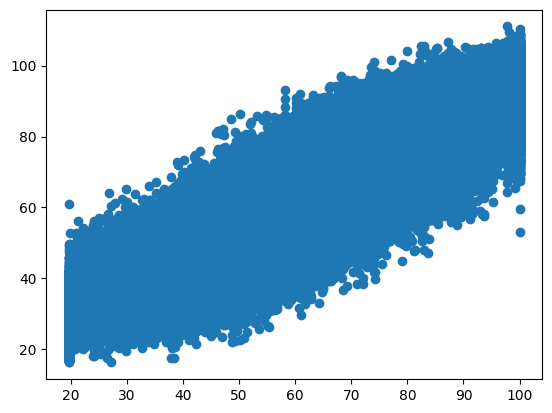

In [26]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,root_mean_squared_error
ridgecv=RidgeCV()
ridgecv.fit(X_train,y_train)
y_pred=ridgecv.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

Rmse value:8.885501550212764
R2_score:0.7778139857354774


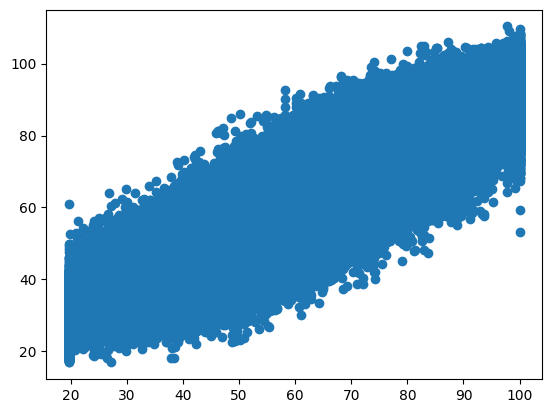

In [24]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score,root_mean_squared_error
ecv=ElasticNetCV(cv=5)
ecv.fit(X_train,y_train)
y_pred=ecv.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Rmse value:{rmse}")
print(f"R2_score:{score}")
plt.scatter(y_test,y_pred)

In [25]:
# from sklearn.ensemble import RandomForestRegressor
# rfr=RandomForestRegressor(n_estimators=300,random_state=42,n_jobs=-1)
# rfr.fit(X_train,y_train)
# y_pred=rfr.predict(X_test)
# rmse=root_mean_squared_error(y_pred,y_test)
# score=r2_score(y_pred,y_test)
# print(f"Rmse value:{rmse}")
# print(f"R2_score:{score}")
# plt.scatter(y_test,y_pred)